#Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Data Pre-Processing

###Importing the Database

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Music Genre Classification/music_dataset_mod.csv')
dataset.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [ ]:
dataset.shape

(1000, 13)

In [ ]:
data = dataset.copy()

### Dealing with NaN Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [ ]:
data['Genre'].isnull().sum()

110

In [ ]:
data.loc[data['Genre'].isna()]

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [ ]:
data['Genre'].value_counts()

,count
Genre,
Rock,190
Jazz,190
Country,180
Hip-hop,168
Classical,162


<ipython-input-10-43cbf9dd3cdc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='PuRd')


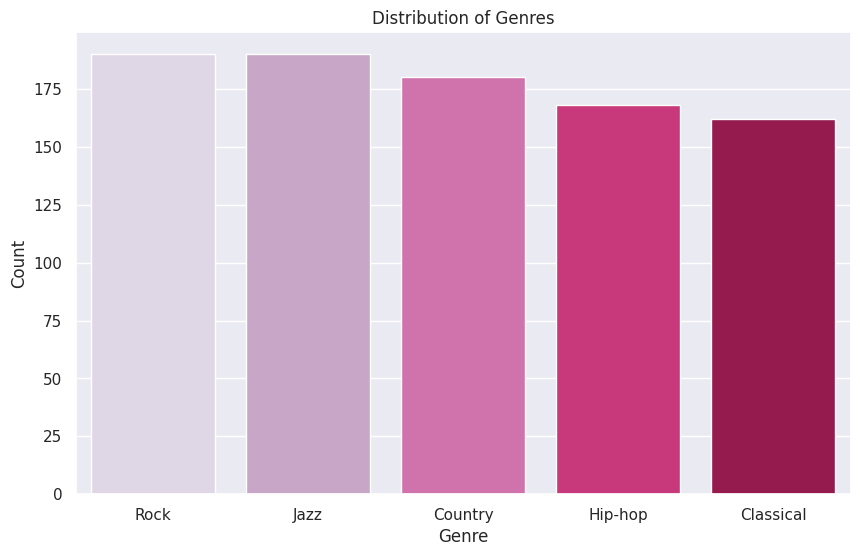

In [ ]:
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='PuRd')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [ ]:
data = data.dropna(how = 'any', axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), object(1)

In [ ]:
data.head(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
5,125.396416,55.489531,36.660016,42.622754,28.114258,49.198285,20.268958,53.603162,51.719769,46.748945,40.072584,54.253725,Rock
6,126.266289,33.170632,34.431812,31.261415,47.921501,118.172945,13.811310,53.252894,45.404283,50.940339,94.448406,82.865538,Hip-hop
7,102.872722,37.401685,58.255022,65.082390,107.201075,60.415823,68.352576,83.943276,44.401688,52.935285,66.928026,4.293606,Country
8,103.651296,69.983670,98.097303,77.514832,54.307746,17.600221,3.856743,50.365287,70.140810,53.438141,7.108158,1.772224,Country
9,111.256855,41.987729,102.047297,89.803807,93.423110,14.978251,11.667792,80.936464,43.423225,52.918957,44.509521,26.362239,Country


### Encoding the Data

In [ ]:
encoded_data = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
encoded_data['Genre_encoded'] = enc.fit_transform(encoded_data['Genre'])
encoded_data.head(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country,1
5,125.396416,55.489531,36.660016,42.622754,28.114258,49.198285,20.268958,53.603162,51.719769,46.748945,40.072584,54.253725,Rock,4
6,126.266289,33.170632,34.431812,31.261415,47.921501,118.172945,13.811310,53.252894,45.404283,50.940339,94.448406,82.865538,Hip-hop,2
7,102.872722,37.401685,58.255022,65.082390,107.201075,60.415823,68.352576,83.943276,44.401688,52.935285,66.928026,4.293606,Country,1
8,103.651296,69.983670,98.097303,77.514832,54.307746,17.600221,3.856743,50.365287,70.140810,53.438141,7.108158,1.772224,Country,1
9,111.256855,41.987729,102.047297,89.803807,93.423110,14.978251,11.667792,80.936464,43.423225,52.918957,44.509521,26.362239,Country,1


In [ ]:
encoded_data = encoded_data.drop(columns = ['Genre'], axis = 1)

In [ ]:
encoded_data.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


### Correlation Matrix and Heatmap

In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre_encoded                890 non-null    int64  
dtypes: float64(12), int64(1)


In [ ]:
corr_matrix = encoded_data.corr()
Genre_corr = corr_matrix['Genre_encoded'].sort_values(ascending = False)
print(Genre_corr)

Genre_encoded                  1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Instrumental Overlaps         -0.071734
String Instrument Detection   -0.185088
Dynamics Range                -0.462600
Name: Genre_encoded, dtype: float64


Axes(0.125,0.11;0.62x0.77)


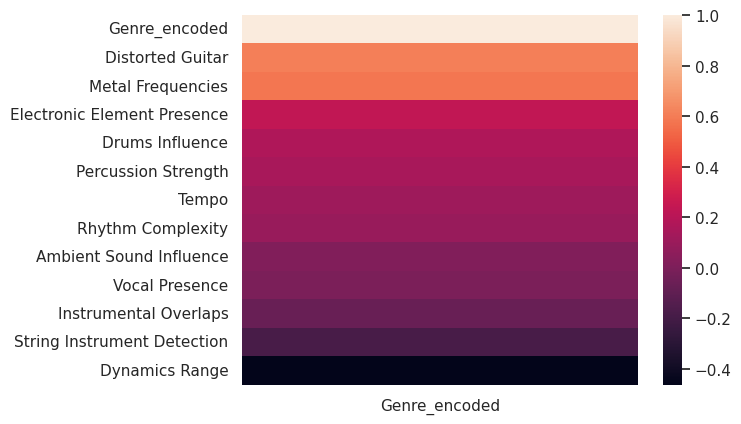

In [ ]:
df_Genre_corr = pd.DataFrame(Genre_corr)
heat = sns.heatmap(df_Genre_corr)
print(heat)

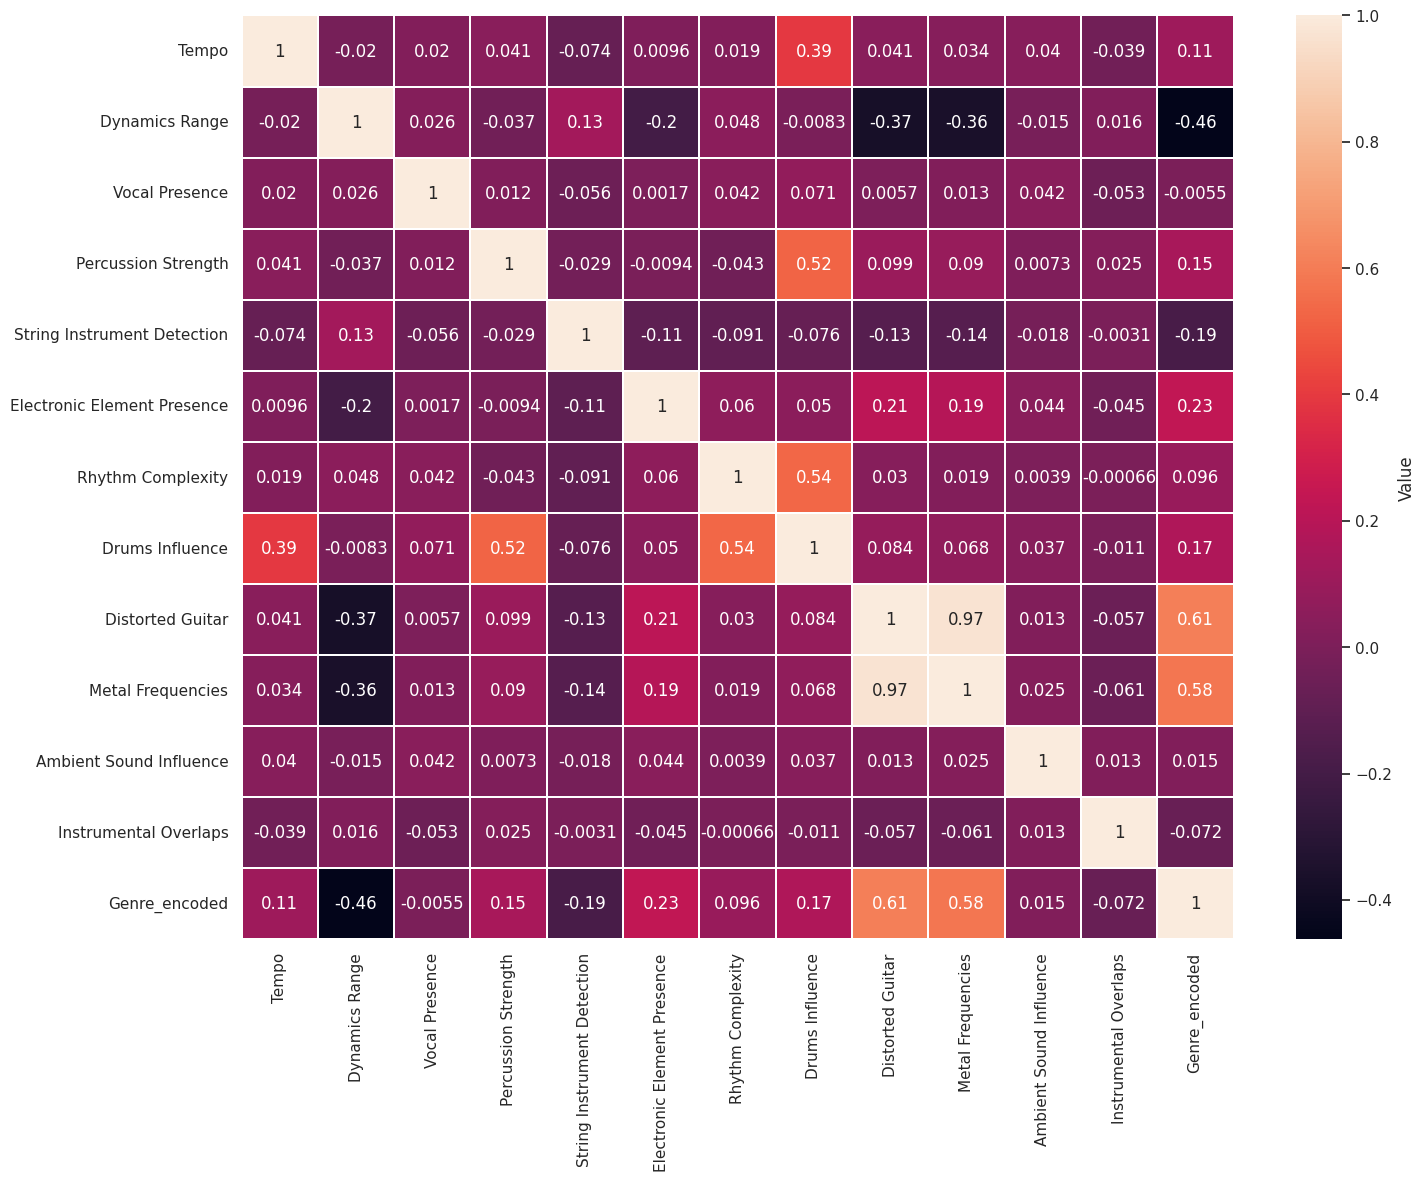

In [ ]:
plt.figure(figsize=(16, 12))

sns.heatmap(data=corr_matrix, annot=True, cbar_kws={'label': 'Value'}, linewidths=0.3)

plt.show()

### Split Data

In [ ]:
X = encoded_data.drop(columns = 'Genre_encoded', axis = 1)
y = encoded_data['Genre_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
df_X_train_scaler = pd.DataFrame(X_train_scaler, columns = X.columns)
df_X_train_scaler.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,1.633862,-0.850506,1.663126,1.054513,0.487386,0.663548,0.695896,1.820655,1.349314,1.188571,0.586796,0.735852
1,1.410396,0.208239,1.364934,1.416315,0.203966,-0.402010,0.992955,2.801654,-1.377965,-1.325142,1.025379,1.024818
2,0.842762,0.386095,0.383833,0.082018,-1.803141,0.893792,0.966474,0.933572,0.069422,0.040725,1.592351,-0.673863
3,-1.821339,-1.042149,1.247761,-0.882022,1.085785,-0.375003,-1.200880,-2.060634,0.238209,0.118930,-0.635581,-0.638625
4,-1.278083,0.861499,0.112048,-0.281450,-0.597041,0.809680,-0.289568,-0.903118,1.248831,0.745023,1.566380,-1.344523


In [ ]:
df_X_test_scaler = pd.DataFrame(X_test_scaler, columns = X.columns)
df_X_test_scaler.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,-0.009197,-1.411317,0.326615,-0.095355,0.623253,0.109319,0.871916,0.461301,1.222066,1.395852,1.270821,-0.506012
1,0.523703,1.155133,1.616224,0.547178,1.105376,0.750082,0.799139,1.338523,0.348480,0.421574,-0.801116,0.853305
2,0.962841,1.646955,-1.039588,-1.782805,1.167460,-1.903666,0.480521,0.044325,-1.397898,-1.485200,0.581783,-0.901716
3,-1.160784,1.330379,0.883197,0.840568,0.365100,0.179569,1.464833,1.337872,-1.448405,-1.485200,0.593305,0.268669
4,-0.135150,0.274995,0.866771,-0.451342,0.998289,-1.373876,-0.833440,-0.752008,-1.446616,-1.485200,0.599865,-1.299112


### Apply PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(df_X_train_scaler)

In [ ]:
pca.explained_variance_ratio_

array([0.20012882, 0.15126161, 0.09456995, 0.08922877, 0.08662344,
       0.08350594, 0.07835823, 0.07404745, 0.06808085, 0.05937978,
       0.01209871, 0.00271645])

In [ ]:
# Load dataset and column names (replace with your own dataset and column names)
column_names = df_X_train_scaler.columns

# Display explained variance ratio for each column
for name, variance_ratio in zip(column_names, pca.explained_variance_ratio_):
    print(f"{name}: {variance_ratio:.2%}")

Tempo: 20.01%
Dynamics Range: 15.13%
Vocal Presence: 9.46%
Percussion Strength: 8.92%
String Instrument Detection: 8.66%
Electronic Element Presence: 8.35%
Rhythm Complexity: 7.84%
Drums Influence: 7.40%
Distorted Guitar: 6.81%
Metal Frequencies: 5.94%
Ambient Sound Influence: 1.21%
Instrumental Overlaps: 0.27%


In [ ]:
pca.n_components_

12

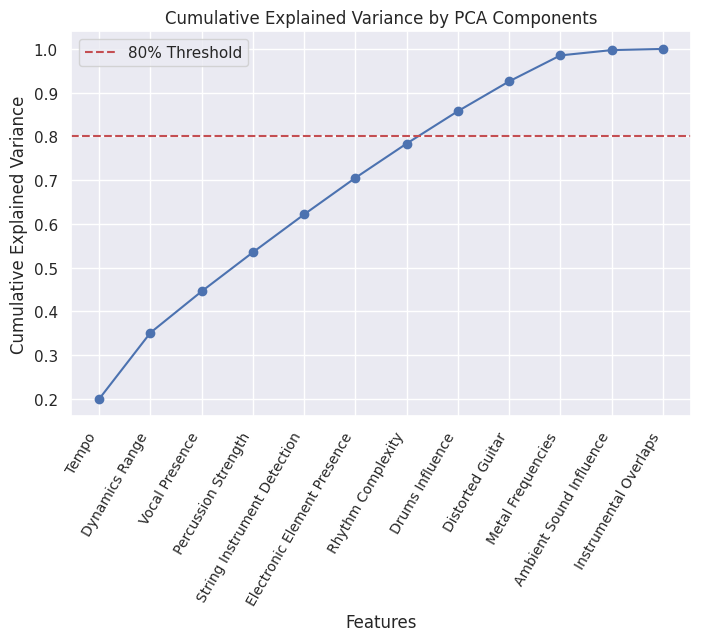

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

columns_names = df_X_train_scaler.columns

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label = '80% Threshold')
plt.xlabel('Features')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.grid(True)

plt.xticks(range(1, len(columns_names) + 1), columns_names, rotation=60, ha='right', fontsize=10)

plt.show()

In [ ]:
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to retain for at least 80% variance: {n_components}")

Number of components to retain for at least 80% variance: 8


In [ ]:
pca_final = PCA(n_components=n_components)
X_train_reduced = pca_final.fit_transform(df_X_train_scaler)
X_test_reduced = pca_final.transform(df_X_test_scaler)

print(f"Shape of reduced dataset: {X_train_reduced.shape}")

Shape of reduced dataset: (623, 8)


In [ ]:
X_train_array = np.asarray(X_train_reduced, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')

X_test_array = np.asarray(X_test_reduced, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

# Logistic Regression with PCA Data

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

model.fit(X_train_array, y_train_array)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = model.predict(X_test_array)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with PCA: {accuracy}')

Accuracy with PCA: 0.5355805243445693


In [ ]:
target_names = ['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test_array, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.98      0.93        51
     Class 1       0.34      0.25      0.29        52
     Class 2       0.48      0.44      0.46        48
     Class 3       0.41      0.42      0.42        62
     Class 4       0.50      0.61      0.55        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



# Logistic Regression Without PCA


In [ ]:
model2 = logist.fit(df_X_train_scaler, y_train)
y_pred2 = model2.predict(df_X_test_scaler)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy without PCA: {accuracy2}")

Accuracy without PCA: 0.5243445692883895


In [ ]:
target_names = ['Class 0','Class 1', 'Class 2', 'Class 3', 'Class 4']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.98      0.92        51
     Class 1       0.33      0.25      0.28        52
     Class 2       0.44      0.46      0.45        48
     Class 3       0.43      0.37      0.40        62
     Class 4       0.49      0.59      0.54        54

    accuracy                           0.52       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.52      0.51       267



#Genre Prediction and Integration


In [ ]:
data2 = dataset.copy()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [ ]:
UnknownGenre = data2.loc[data2['Genre'].isna()]
UnknownGenre.shape

(110, 13)

In [ ]:
X_UnknownGenre = UnknownGenre.drop(columns = 'Genre', axis = 1)
y_UnKnownGenre = UnknownGenre['Genre']

In [ ]:
X_UnknownGenre_scaler = scaler.transform(X_UnknownGenre)
df_X_UnknownGenre_scaler = pd.DataFrame(X_UnknownGenre)

In [ ]:
X_UnknownGenreScalerPca = pca_final.transform(df_X_UnknownGenre_scaler)

In [ ]:
y_UnknownGenre_pred = model.predict(X_UnknownGenreScalerPca)

In [ ]:
y_UnknownGenre_pred

array([0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       0, 4, 4, 4, 0, 3, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 3, 0, 0, 4,
       4, 3, 4, 3, 0, 3, 4, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4,
       3, 0, 4, 4, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 3, 0, 4, 3, 4,
       4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0])

In [ ]:
y_UnknownGenre_pred_inverse = enc.inverse_transform(y_UnknownGenre_pred)
y_UnknownGenre_pred_inverse

array(['Classical', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Jazz',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Jazz', 'Jazz', 'Rock', 'Jazz', 'Rock',
       'Classical', 'Rock', 'Rock', 'Rock', 'Classical', 'Jazz',
       'Classical', 'Rock', 'Classical', 'Rock', 'Rock', 'Rock', 'Rock',
       'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Jazz', 'Classical',
       'Classical', 'Rock', 'Rock', 'Jazz', 'Rock', 'Jazz', 'Classical',
       'Jazz', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Jazz',
       'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Classical', 'Classical',
       'Rock', 'Rock', 'Rock', 'Jazz', 'Classical', 'Rock', 'Rock',
       'Jazz', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock',
       'Rock', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Jazz',
       'Classical', 'Rock', 'Jazz', 'Rock', 'Rock', 'Rock', 'Classical',
       'Rock', 'Rock', 'Classical', 'Rock', 'Rock', 'Classical', 'Rock',
       'Classical', 'Ro

In [ ]:
y_UnknownGenre_pred_inverse.shape

(110,)

In [ ]:
predicted_genres_series = pd.Series(y_UnknownGenre_pred_inverse)

In [ ]:
missing_count = data2['Genre'].isna().sum()
print(f"Number of Null values ​​in a column Genre: {missing_count}")

predicted_count = len(predicted_genres_series)
print(f"Number of expected values: {predicted_count}")
if missing_count == predicted_count:
    data2.loc[data2['Genre'].isna(), 'Genre'] = predicted_genres_series.values
    print("Updated successfully.")
else:
    print("Ensure that the number of expected values ​​equals the number of blank values ​​in the column Genre.")

Number of Null values ​​in a column Genre: 110
Number of expected values: 110
Updated successfully.


In [ ]:
data2.head(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
5,125.396416,55.489531,36.660016,42.622754,28.114258,49.198285,20.268958,53.603162,51.719769,46.748945,40.072584,54.253725,Rock
6,126.266289,33.170632,34.431812,31.261415,47.921501,118.172945,13.811310,53.252894,45.404283,50.940339,94.448406,82.865538,Hip-hop
7,102.872722,37.401685,58.255022,65.082390,107.201075,60.415823,68.352576,83.943276,44.401688,52.935285,66.928026,4.293606,Country
8,103.651296,69.983670,98.097303,77.514832,54.307746,17.600221,3.856743,50.365287,70.140810,53.438141,7.108158,1.772224,Country
9,111.256855,41.987729,102.047297,89.803807,93.423110,14.978251,11.667792,80.936464,43.423225,52.918957,44.509521,26.362239,Country


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj

In [ ]:
data2.loc[[992]]

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
992,117.892313,35.001524,76.506358,77.97257,80.765657,13.759213,59.985923,80.108786,93.831262,100.0,15.851851,47.984445,Rock
